In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import sys
import os
import xarray as xr
import math
import numpy as np
import matplotlib.pyplot as plt

In [60]:
sys.path.append('/home/cucchi/phd/devel/phd/')
RESP_PATH = '/home/cucchi/phd/data/response/lorenz96/rk4/DF_8_0.5_0/'

In [61]:
from lab import analysis
from lab.simulation import forcings

In [62]:
response_mean = xr.open_dataarray(os.path.join(RESP_PATH, 'response_lorenz96_rk4_energy_DF_8_0.5_0.nc'))
response_mean = response_mean.values
response_mean = np.squeeze(response_mean)

In [63]:
response_mean

array([0.        , 0.01160841, 0.01177694, ..., 0.31320965, 0.32636344,
       0.3384487 ], dtype=float32)

In [64]:
chi = analysis.compute_green_function(response_mean)

In [65]:
nfft = 2**(math.ceil(math.log2(abs(len(response_mean)))))

In [80]:
step_forcing = forcings.StepForcing()
f = [8.1 - 8 for i in np.arange(nfft)]

In [81]:
f_extd = np.zeros(2*nfft)
f_extd[0:len(f)] = f
F_extd = np.fft.fft(f_extd)

In [82]:
len(F_extd)
len(chi)

32768

In [83]:
f_resp = np.fft.ifft(chi*F_extd)

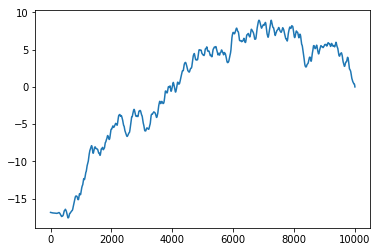

In [84]:
plt.plot(np.real(f_resp[0:len(response_mean)]))

In [57]:
response_mean

array([0.        , 0.01160841, 0.01177694, ..., 0.31320965, 0.32636344,
       0.3384487 ], dtype=float32)